# **Machine Learning: Bank Churn.**

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
pd.options.display.max_columns=21

## **UNDERSTANDING THE DATASET DOMAIN.**

In [4]:
df = pd.read_csv('BankChurners.csv')

In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
df.shape

(10127, 21)

In [7]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [8]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### Columns description:
**1.	CLIENTNUM:** Unique customer identifier \
**2.	Attrition_Flag:** Indicates if the customer is still valid or has canceled the card \
**3.	Customer_Age:** Customer age \
**4.	Gender:** Customer gender \
**5.	Dependent_count:** Number of dependents the client owns \
**6.	Education_Level:** Educational level of the client \
**7.	Marital_Status:** Client's marital status \
**8.	Income_Category:** Customer revenue categorization \
**9.	Card_Category:** Type of card that the customer has \
**10.	Months_on_book:** Number of months since the customer has the credit card \
**11.	Total_Relationship_Count:** Number of products the customer has \
**12.	Months_Inactive_12_mon:** Number of months inactive in the last 12 months \
**13.	Contacts_Count_12_mon:** Number of times the customer was contacted in the last 12 months \
**14.	Credit_Limit:** Card credit limit \
**15.	Total_Revolving_Bal:** A revolving balance is the portion of a credit card spend that is not paid at the end of a billing cycle \
**16.	Avg_Open_To_Buy:** Average available balance \
**17.	Total_Amt_Chng_Q4_Q1:** Changes in transaction amounts \
**18.	Total_Trans_Amt:** Total amount of transactions \
**19.	Total_Trans_Ct:** Total number of transactions \
**20.	Total_Ct_Chng_Q4_Q1:** Changes in the number of transactions \
**21.	Avg_Utilization_Ratio:** Average card usage \

### The column *Attritio_Flag* will constitute our target variable. In order to achieve the best predictions, we need to know how it behaves with respect to the *features* or remaining columns.

### Description of categorical variables.

In [9]:
df.Attrition_Flag.unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [10]:
df.Attrition_Flag.value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [11]:
object_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

In [13]:
for i in object_columns:
    print(i, '\n')
    print(df.groupby('Attrition_Flag')[i].value_counts())
    print('Number of unique values:', df[i].nunique())
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n')

Gender 

Attrition_Flag     Gender
Attrited Customer  F          930
                   M          697
Existing Customer  F         4428
                   M         4072
Name: Gender, dtype: int64
Number of unique values: 2
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Education_Level 

Attrition_Flag     Education_Level
Attrited Customer  Graduate            487
                   High School         306
                   Unknown             256
                   Uneducated          237
                   College             154
                   Doctorate            95
                   Post-Graduate        92
Existing Customer  Graduate           2641
                   High School        1707
                   Unknown            1263
                   Uneducated         1250
                   College             859
                   Post-Graduate       424
                   Doctorate           356
Name: Education

### Description of numerical variables.

*A selection of columns is made, considering in the first instance those that are considered most relevant at personal criteria.*

In [14]:
numerical_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Credit_Limit','Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

In [15]:
for i in numerical_columns:
    print(i, '\n')
    print(df.groupby('Attrition_Flag')[i].describe())
    print('Number of unique values:', df[i].nunique())
    print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n')

Customer_Age 

                    count       mean       std   min   25%   50%   75%   max
Attrition_Flag                                                              
Attrited Customer  1627.0  46.659496  7.665652  26.0  41.0  47.0  52.0  68.0
Existing Customer  8500.0  46.262118  8.081157  26.0  41.0  46.0  52.0  73.0
Number of unique values: 45
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Dependent_count 

                    count      mean       std  min  25%  50%  75%  max
Attrition_Flag                                                        
Attrited Customer  1627.0  2.402581  1.275010  0.0  2.0  2.0  3.0  5.0
Existing Customer  8500.0  2.335412  1.303229  0.0  1.0  2.0  3.0  5.0
Number of unique values: 6
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Months_on_book 

                    count       mean       std   min   25%   50%   75%   max
Attrition_Flag            

## Variable engineering.

### Outlier detection.

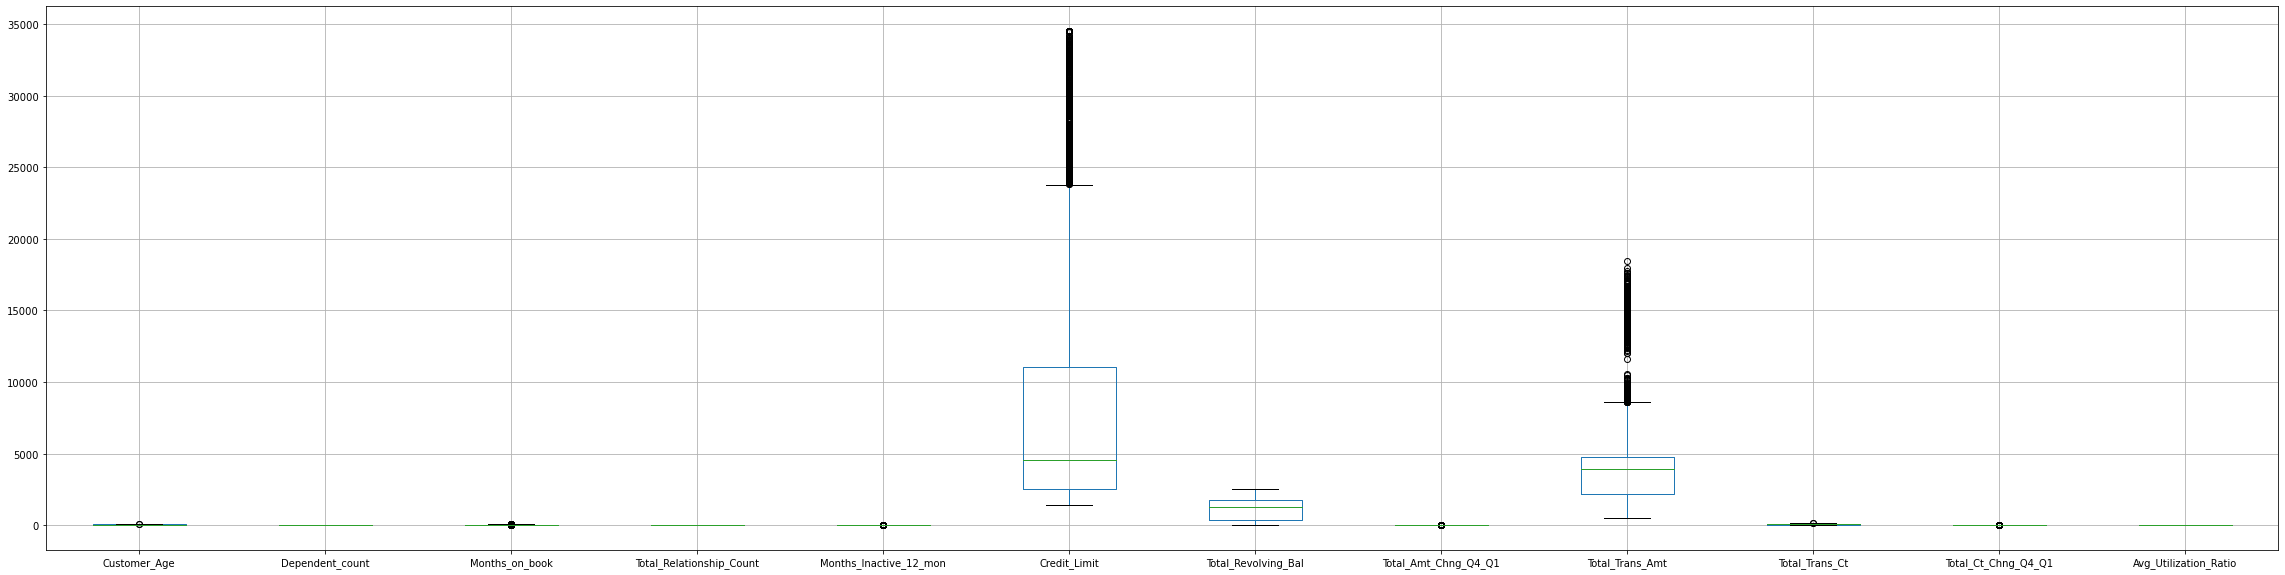

In [18]:
boxplots=df.boxplot(column= numerical_columns, figsize=(40,10))

In [19]:
first_group =  ['Dependent_count', 'Total_Relationship_Count', 'Avg_Utilization_Ratio']

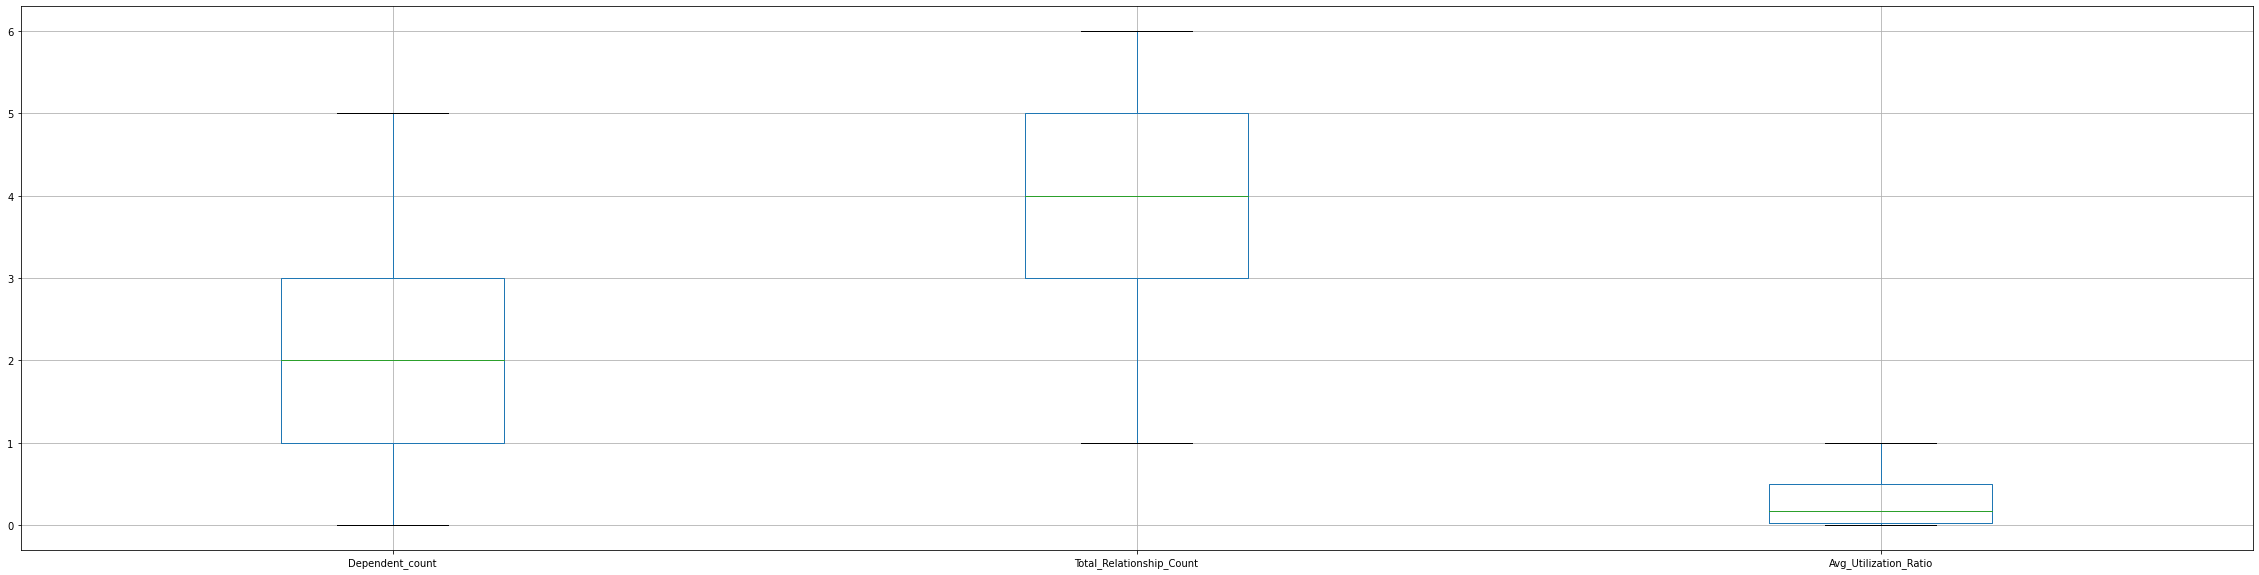

In [20]:
boxplots=df.boxplot(column = first_group, figsize=(40,10))

In [21]:
second_group = ['Customer_Age', 'Months_on_book','Months_Inactive_12_mon', 'Total_Trans_Ct','Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']

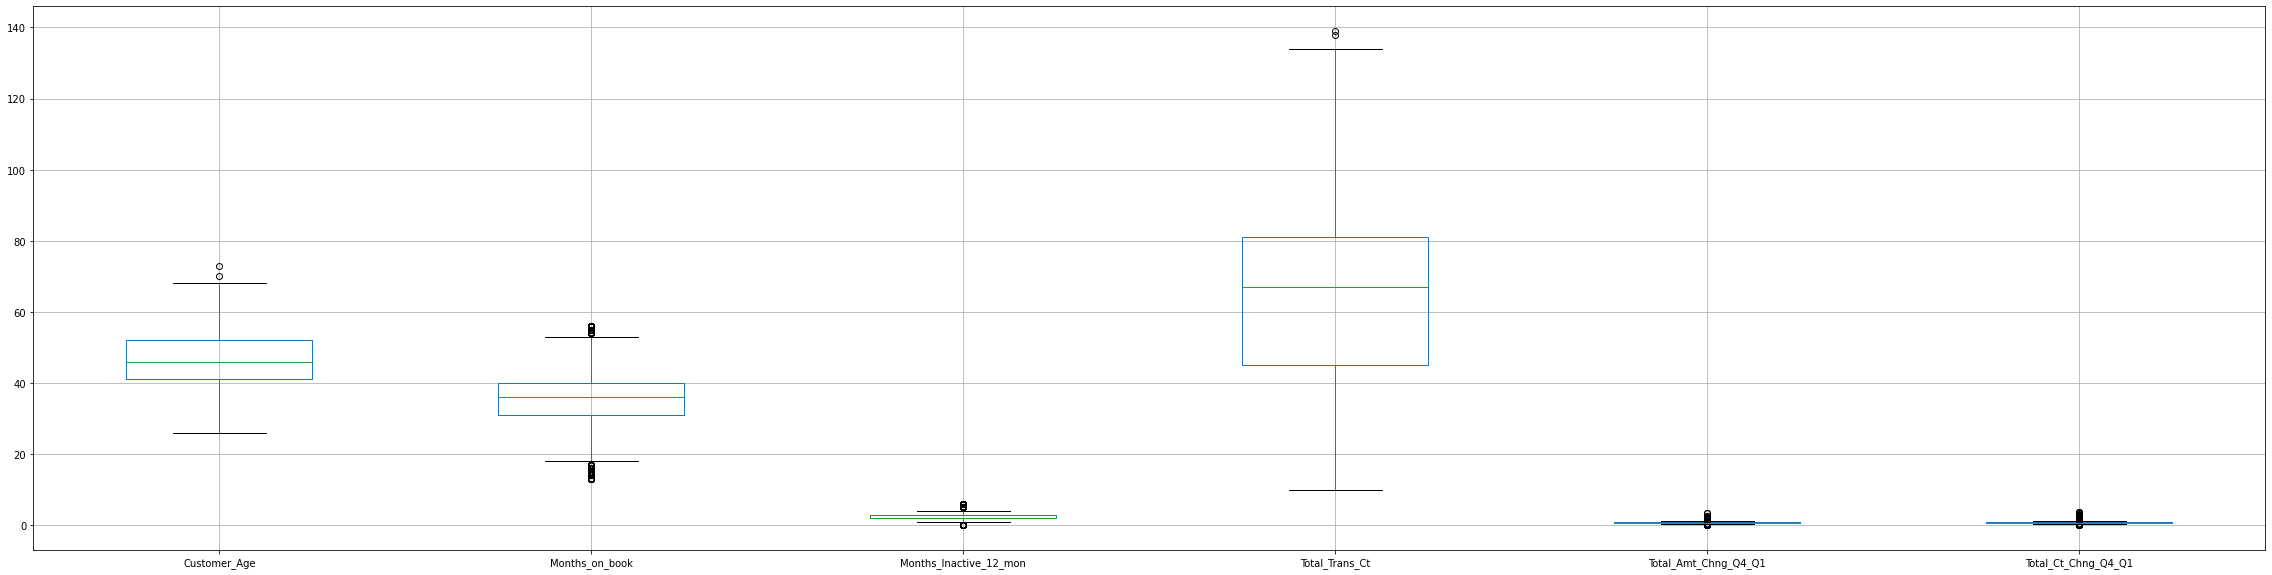

In [23]:
boxplots=df.boxplot(column= second_group, figsize=(40,10))

### Analysis on specific column.

In [24]:
sc = df.loc[:, ['Customer_Age', 'Months_on_book', 'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct','Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']]

In [25]:
print('Percentage of outliers by columns with respect to the total number of records')
for i in sc:
    q3 = sc.loc[:, i].quantile(0.75)
    q1 = sc.loc[:, i].quantile(0.25)
    iqr = q3 + 1.5 * (q3-q1)
    cantMayIQR = sc[sc.loc[:, i] > iqr][i].count()
    cantReg = df.shape[0]
    porcentaje= (cantMayIQR / cantReg) * 100
    print(i, ':', round(porcentaje,2),'%', '\n')

Percentage of outliers by columns with respect to the total number of records
Customer_Age : 0.02 % 

Months_on_book : 1.96 % 

Months_Inactive_12_mon : 2.98 % 

Credit_Limit : 9.72 % 

Total_Trans_Amt : 8.85 % 

Total_Trans_Ct : 0.02 % 

Total_Amt_Chng_Q4_Q1 : 3.44 % 

Total_Ct_Chng_Q4_Q1 : 2.94 % 



In [26]:
print('Amount of data greater than 99% of the population')
for i in sc:
    q99 = sc.loc[:, i].quantile(0.99)
    print(i, ':', sc[sc.loc[:, i] > q99][i].count(), '\n')

Amount of data greater than 99% of the population
Customer_Age : 10 

Months_on_book : 0 

Months_Inactive_12_mon : 0 

Credit_Limit : 0 

Total_Trans_Amt : 102 

Total_Trans_Ct : 93 

Total_Amt_Chng_Q4_Q1 : 102 

Total_Ct_Chng_Q4_Q1 : 101 



### Elimination of outliers.

In [27]:
cuantil_99= df.Total_Trans_Amt.quantile(0.99)
df[df.Credit_Limit>cuantil_99].Total_Trans_Amt.count()

1711

### Detection and treatment of null values:
We use the random imputation method for all cases. \
*Obs.: In this DataSet null values are represented by Unknown.*

In [28]:
#Create a function to assign a random value to the unknown data
def imputar_metodo_aleatorio(x,col):
    import random
    if pd.isnull(x):
        res=np.random.choice(df[df[col].notnull()][col]) #Randomly select a value that is not null 
    else:
        res=x
    return res

In [29]:
df.Education_Level=df.Education_Level.replace('Unknown', np.nan)
df['Education_Level']=df['Education_Level'].apply(imputar_metodo_aleatorio,col='Education_Level') #Apply that method to each row

In [30]:
df.Marital_Status=df.Marital_Status.replace('Unknown', np.nan)
df['Marital_Status']=df['Marital_Status'].apply(imputar_metodo_aleatorio,col='Marital_Status') #Apply that method to each row

In [31]:
df.Income_Category=df.Income_Category.replace('Unknown', np.nan)
df['Income_Category']=df['Income_Category'].apply(imputar_metodo_aleatorio,col='Income_Category') #Apply that method to each row

### Coding of categorical variables.

In [32]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

In [33]:
df.select_dtypes(['object']).columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

* **Attrition_flag** --> OrdinalEncoder
* **Gender** --> OneHotEncoder
* **Marital Status** --> OneHotEncoder
* **Education Level** --> OrdinalEncoder
* **Income_Category** --> OrdinalEncoder
* **Card_Category** --> OrdinalEncoder

**Attrition_Flag** \
* Existing Customer: 0
* Attrited Customer: 1

In [34]:
enc0= OrdinalEncoder(categories=[['Existing Customer','Attrited Customer']])
aux0= pd.DataFrame(enc0.fit_transform(df[['Attrition_Flag']]), columns=['Attrition_Flag'])
df=df.drop(['Attrition_Flag'], axis=1)
df=df.join(aux0)

**Gender**

In [35]:
enc1=OneHotEncoder() #Instantiate the object
#Create the columns with their respective name, and with the fit transform I assign a value of 1 or 0, and pass it to an array to create the new dataframe
aux1=pd.DataFrame(enc1.fit_transform(df[['Gender']]).toarray(),
                 columns=['F', 'M'])  
df=df.join(aux1)
df=df.drop(['Gender'], axis=1)

**Marital Status**

In [36]:
enc2=OneHotEncoder() #Instantiate the object
#Create the columns with their respective name, and with the fit transform I assign a value of 1 or 0, and pass it to an array to create the new dataframe
aux2=pd.DataFrame(enc2.fit_transform(df[['Marital_Status']]).toarray(),
                 columns=['Divorced','Married', 'Single'])  
df=df.join(aux2)
df=df.drop(['Marital_Status'], axis=1)

**Education Level**
* 0 = Uneducated
* 1 = High School
* 2 = College
* 3 = Graduate
* 4 = Post-Graduate
* 5 = Doctorate

In [37]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [38]:
enc3=OrdinalEncoder(categories=[['Uneducated','High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']])
aux3= pd.DataFrame(enc3.fit_transform(df[['Education_Level']]), columns=['Education_Level'])
df=df.drop(['Education_Level'], axis=1)
df=df.join(aux3)

**Income Category**
* 0 = Less than $40

* 1 = $40K - $60

* 2 = $60K - $80

* 3 = $80K - 120

* 4 = $120K +

In [39]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +'], dtype=object)

In [40]:
enc4=OrdinalEncoder(categories=[['Less than $40K','$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']])
aux4= pd.DataFrame(enc4.fit_transform(df[['Income_Category']]), columns=['Income_Category'])
df=df.drop(['Income_Category'], axis=1)
df=df.join(aux4)

**Card category**
* 0 = Blue
* 1 = Silver
* 2 = Gold
* 3 = Platinum

In [41]:
df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [42]:
enc5=OrdinalEncoder(categories=[['Blue','Silver','Gold','Platinum']])
aux5= pd.DataFrame(enc5.fit_transform(df[['Card_Category']]), columns=['Card_Category'])
df=df.drop(['Card_Category'], axis=1)
df=df.join(aux5)

In [43]:
df.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Avg_Utilization_Ratio,Attrition_Flag,F,M,Divorced,Married,Single,Education_Level,Income_Category,Card_Category
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,0.061,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,...,0.105,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,...,0.000,0.0,0.0,1.0,0.0,1.0,0.0,3.0,3.0,0.0
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,...,0.760,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,...,0.000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0


## Correlation analysis.

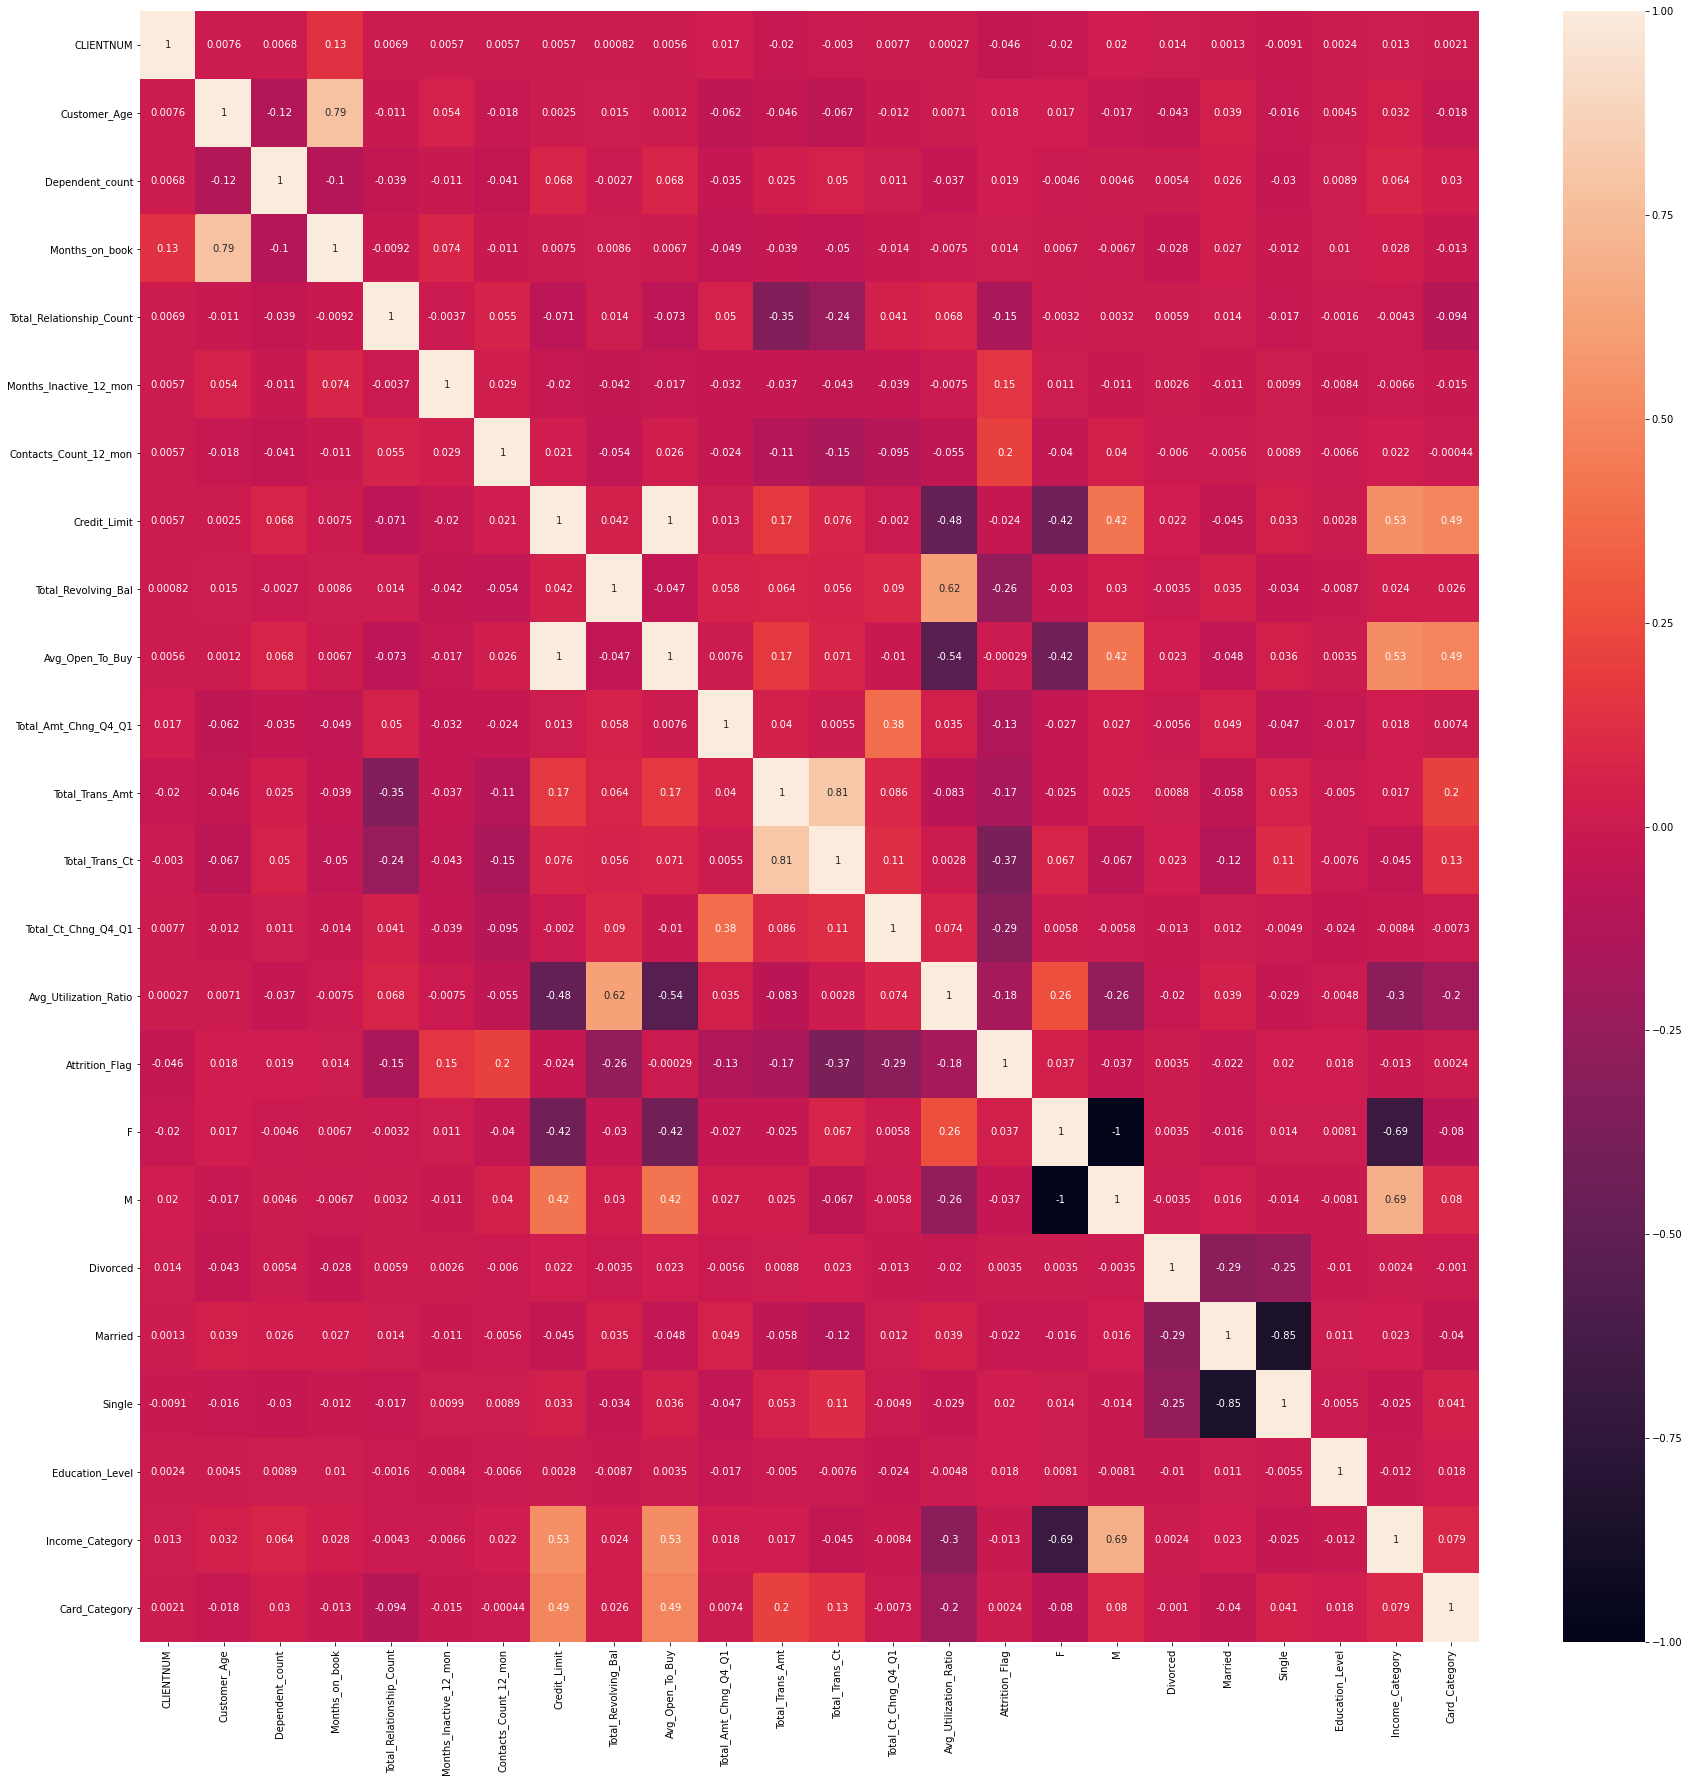

In [48]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),
           annot=True);

**Columns to use to predict the Attrition_Flag variable**:
* Total_Relationship_Count
* Mounths_Inactive_12_mon
* Contacts_Count_12_mon
* Total_Revolving_Bal
* Total_Amt_Chng_Q4_Q1
* Total_Trans_Amt
* Total_Tans_Ct
* Total_Ct_Chng_Q4_Q1
* Avg_Utilization_Ratio


## Distribution analysis.

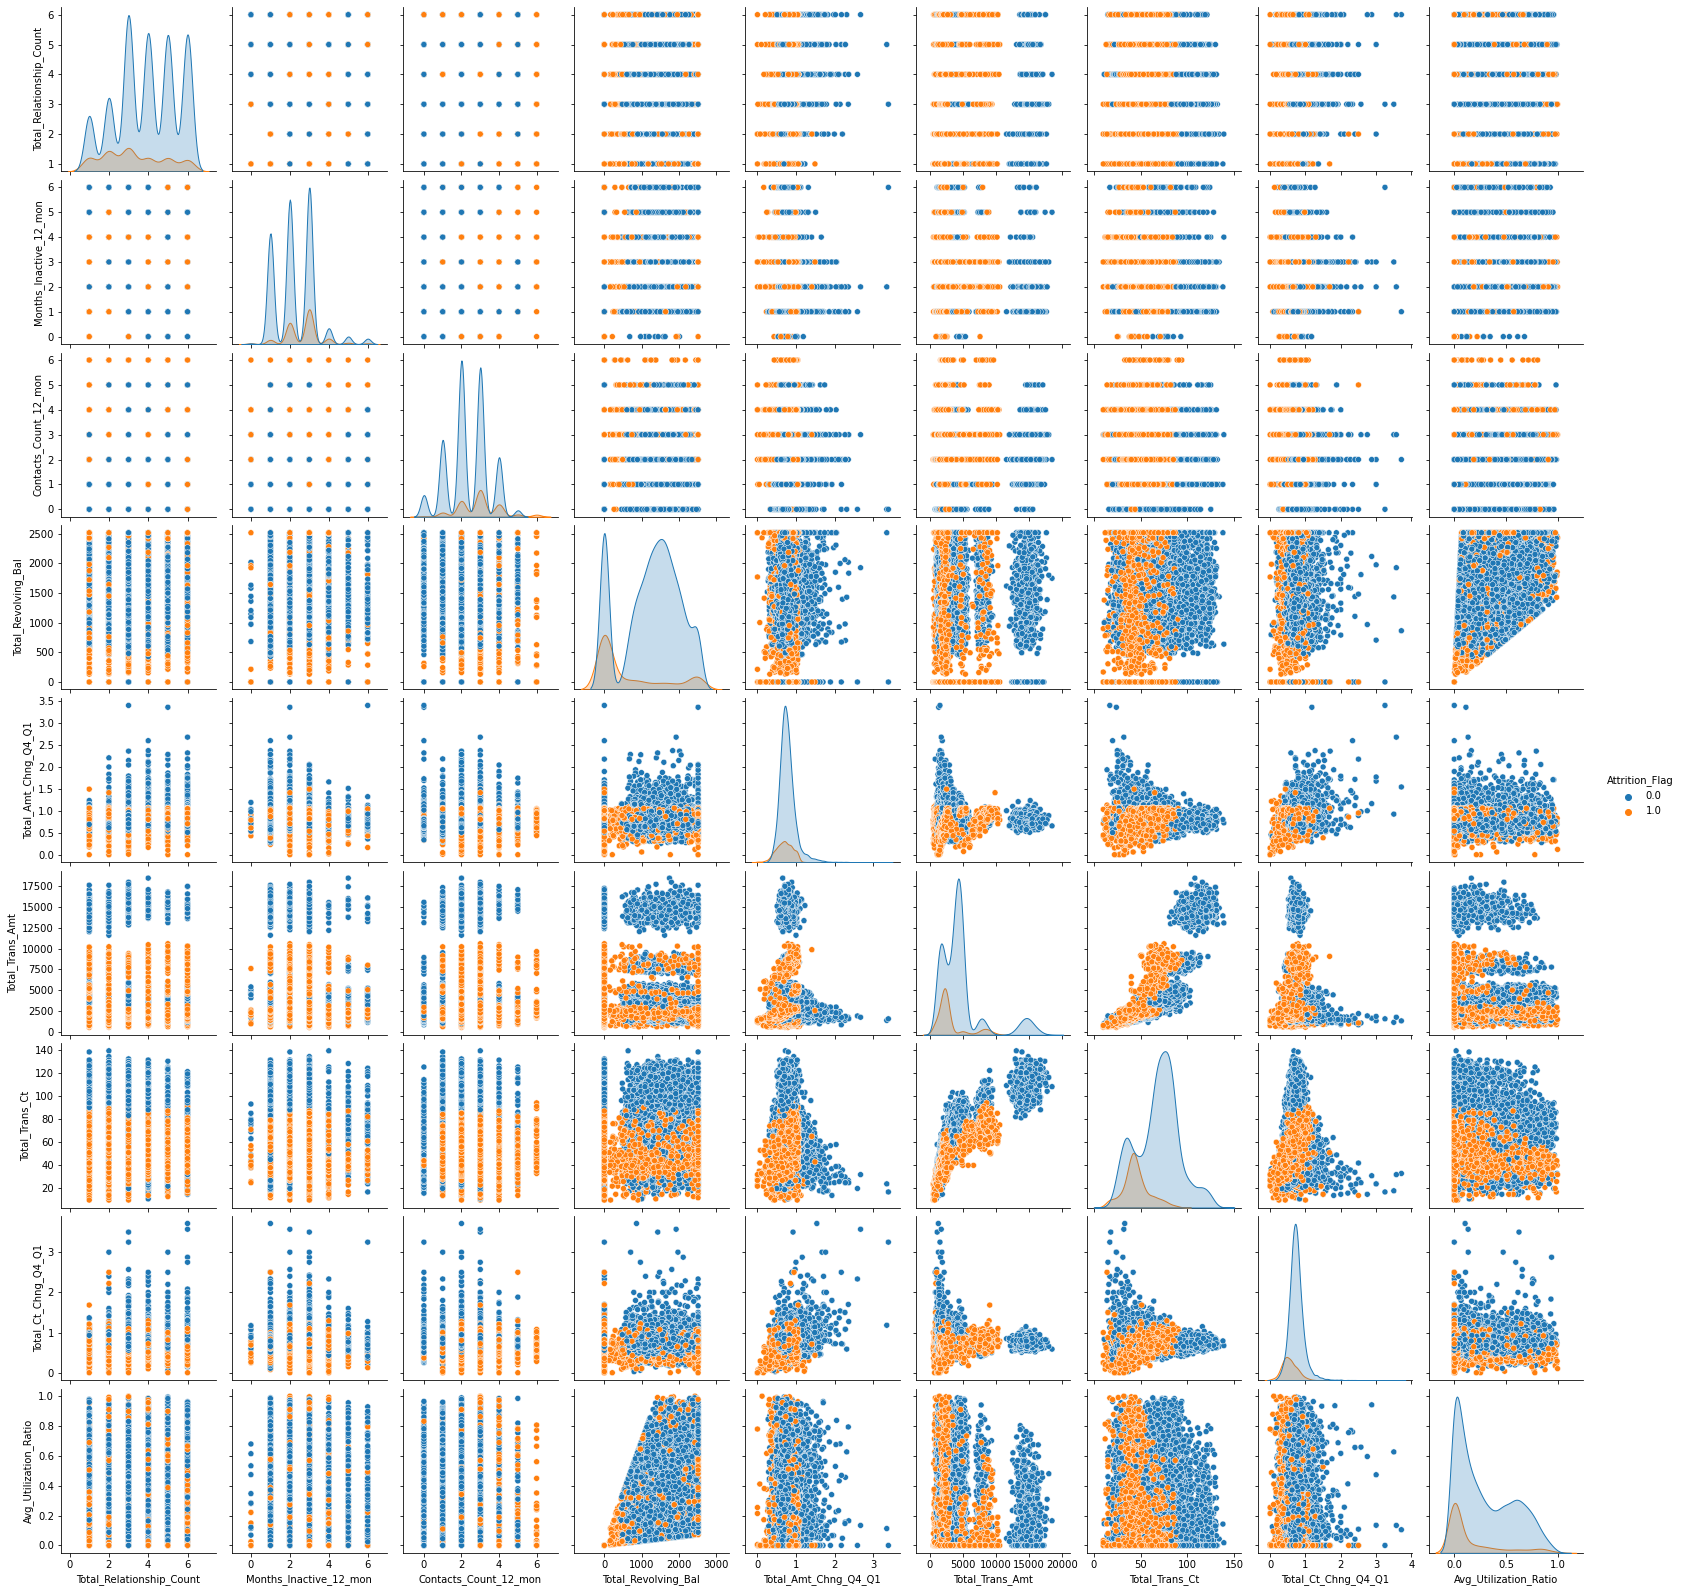

In [49]:
sns.pairplot(df[['Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio','Attrition_Flag']],hue='Attrition_Flag', height=2.5);

In [50]:
newsc = df.loc[:,['Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio','Attrition_Flag']]

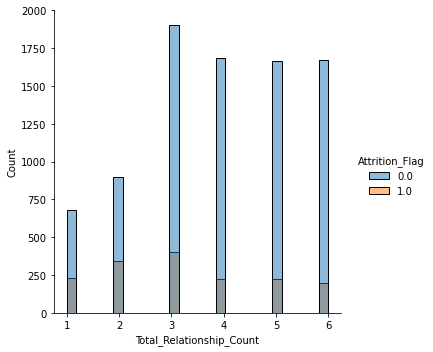

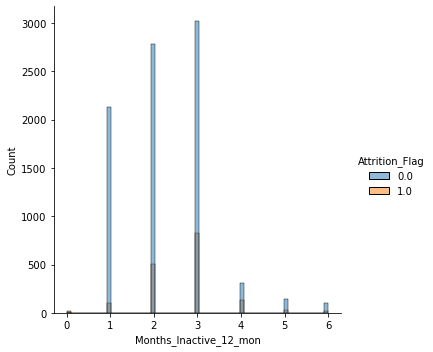

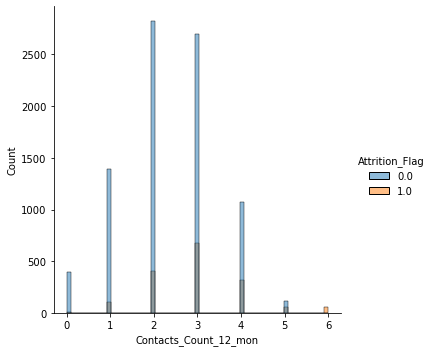

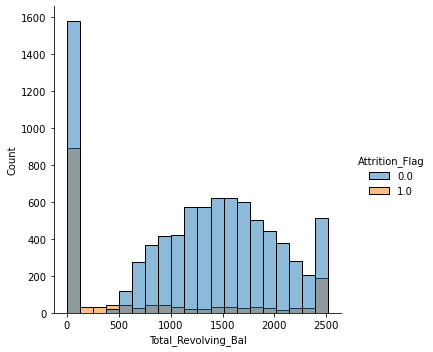

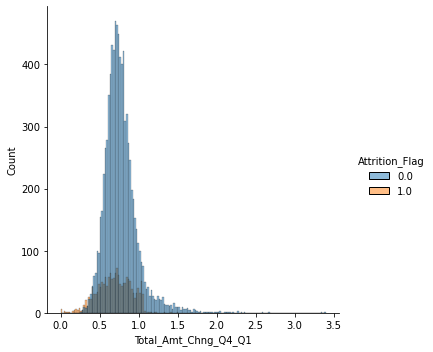

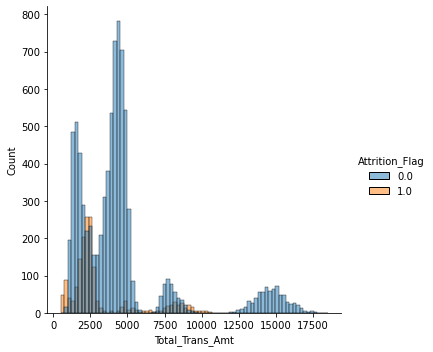

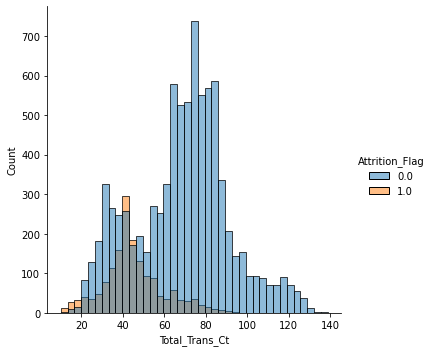

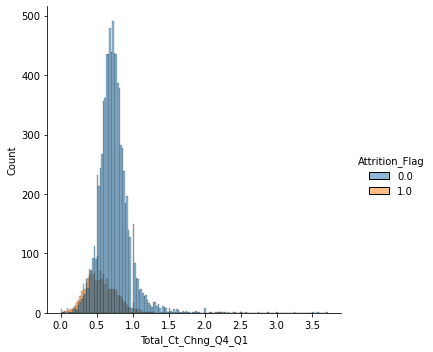

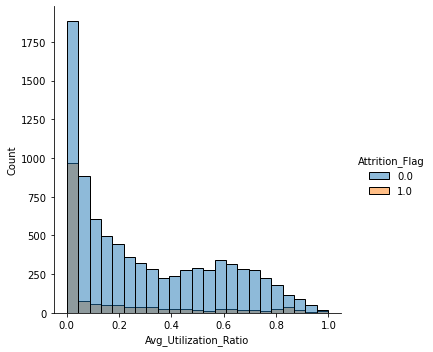

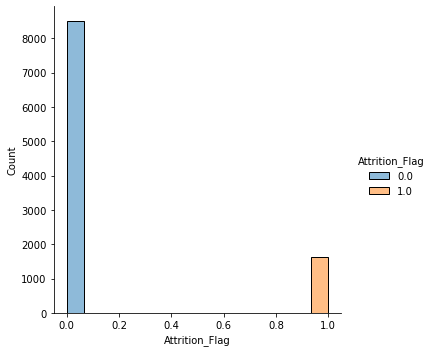

In [51]:
for i in newsc:
    sns.displot(data = newsc,
               x = newsc.loc[:, i],
               hue = df.Attrition_Flag)

##  TRAIN MODELS.

- KNN
- SVM
- Arbol de decision

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

### Creation of a pipeline.

In [53]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [54]:
preprocesador= make_column_transformer(
                (MinMaxScaler(), ['Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']),
                remainder='drop'
                )

**Select the variables that will be predictors of the variable to be predicted Y.**

In [55]:
X = df[['Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

**Select the variable to predict.**

In [56]:
y = df['Attrition_Flag']

**Divide into training set and test set.**

In [57]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.30, random_state=33)

### Class balancing: Oversampling.

In [58]:
from imblearn.over_sampling import RandomOverSampler

In [59]:
oversample=RandomOverSampler(sampling_strategy=1)
X_train_oversampl, y_train_oversampl=oversample.fit_resample(X_train, y_train)

In [60]:
X_train_oversampl.shape

(11876, 9)

In [61]:
y_train_oversampl.value_counts()

0.0    5938
1.0    5938
Name: Attrition_Flag, dtype: int64

In [62]:
y_train.value_counts()

0.0    5938
1.0    1150
Name: Attrition_Flag, dtype: int64

## Selection of the best model.

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

In [64]:
fold=KFold(n_splits=4, random_state=1, shuffle=True)

In [65]:
def entrenarModelos(modelos, X_train, y_train, X_test, y_test, params, preprocesador):
    for i in range(len(modelos)):
        model_pipe=make_pipeline(preprocesador, modelos[i])
        grid = GridSearchCV(model_pipe,  
                            param_grid=params[i],
                            cv=fold,
                            n_jobs=-1,
                            )
        grid.fit(X_train, y_train)
        y_pred= grid.predict(X_test)
        print('---------------------------------')
        print(str(modelos[i]),'\n')
        print("Best parameter (CV score=%0.3f):" % grid.best_score_)
        print(grid.best_params_)
        print('Accuracy Score : ', round(accuracy_score(y_test,y_pred),2))
        print('Recall Score : ',  round(recall_score(y_test,y_pred), 2))
        print('Precision Score : ',  round(precision_score(y_test,y_pred), 2))
        print('F1 Score : ', round(f1_score(y_test,y_pred), 2))
        print('\nMatriz de confusion')
        print(pd.DataFrame(confusion_matrix(y_test, y_pred)))
        print('\n')

In [66]:
modelos=[DecisionTreeClassifier(), SVC(), KNeighborsClassifier()]
params=[{'decisiontreeclassifier__criterion': ['gini', 'entropy'],'decisiontreeclassifier__max_depth':[5,10,15,18,20,25,30,50,80]},
           {'svc__kernel': ['rbf','linear'], 'svc__C': [1, 10, 100, 1000]},
           {'kneighborsclassifier__n_neighbors': [3,5,7,11]}]
entrenarModelos(modelos, X_train_oversampl, y_train_oversampl, X_test, y_test, params, preprocesador)

---------------------------------
DecisionTreeClassifier() 

Best parameter (CV score=0.977):
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 30}
Accuracy Score :  0.93
Recall Score :  0.75
Precision Score :  0.79
F1 Score :  0.77

Matriz de confusion
      0    1
0  2465   97
1   118  359


---------------------------------
SVC() 

Best parameter (CV score=0.961):
{'svc__C': 1000, 'svc__kernel': 'rbf'}
Accuracy Score :  0.92
Recall Score :  0.83
Precision Score :  0.7
F1 Score :  0.76

Matriz de confusion
      0    1
0  2391  171
1    81  396


---------------------------------
KNeighborsClassifier() 

Best parameter (CV score=0.945):
{'kneighborsclassifier__n_neighbors': 3}
Accuracy Score :  0.9
Recall Score :  0.81
Precision Score :  0.66
F1 Score :  0.73

Matriz de confusion
      0    1
0  2362  200
1    89  388




**SVC Model is chosen since it gives a recall of 0.83 through the oversampling class balancing method**.

## Final model training.

In [81]:
X_test_transform=pd.DataFrame(preprocesador.fit_transform(X_test))
X_train_transform=pd.DataFrame(preprocesador.fit_transform(X_train_oversampl))

In [82]:
model_svc= SVC(C=1000, kernel='rbf', probability=True)

In [83]:
model_svc.fit(X_train_transform, y_train_oversampl)

SVC(C=1000, probability=True)

In [84]:
y_pred= model_svc.predict(X_test_transform)

In [85]:
print('Accuracy Score : ', round(accuracy_score(y_test,y_pred),2))
print('Recall Score : ',  round(recall_score(y_test,y_pred), 2))
print('Precision Score : ',  round(precision_score(y_test,y_pred), 2))
print('F1 Score : ', round(f1_score(y_test,y_pred), 2))
print('\nMatriz de confusion')
pd.DataFrame(confusion_matrix(y_test, y_pred))

Accuracy Score :  0.91
Recall Score :  0.82
Precision Score :  0.69
F1 Score :  0.75

Matriz de confusion


,0,1
0,2391,171
1,88,389


**In this way, the model is able to identify 82% of customers who are prone to abandon the credit card.**

In [86]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [87]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(13,7))
    plt.plot([0,1], [0, 1], color='red', linestyle='--')
    plt.plot(fpr, tpr, color='blue')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.show();

In [88]:
model_pipe=make_pipeline(preprocesador,
                          model_svc)

In [89]:
model_pipe.fit(X_train_oversampl, y_train_oversampl)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Total_Revolving_Bal',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio'])])),
                ('svc', SVC(C=1000, probability=True))])

In [90]:
probs=model_pipe.predict_proba(X_test)

In [91]:
probs=probs[:,1]

In [92]:
roc_auc_score(y_test, probs)

0.9497992756576116

In [93]:
fpr, tpr, umbral= roc_curve(y_test, probs)

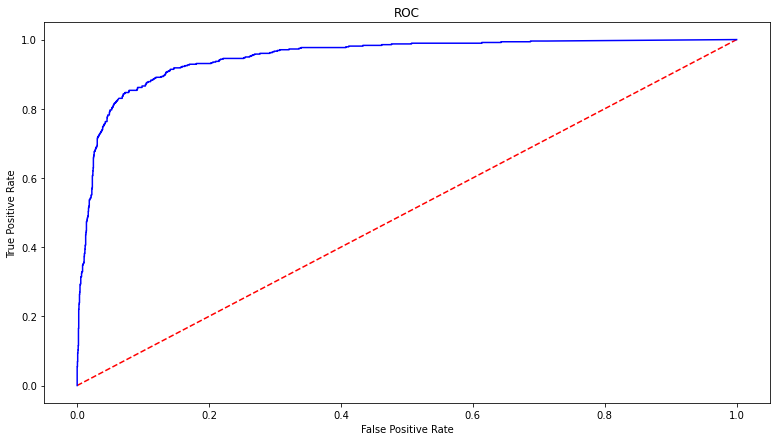

In [94]:
plot_roc_curve(fpr, tpr)

**According to the ROC curve, the model has a good prediction rate for both churn and non-churn cases.**